<a href="https://www.kaggle.com/code/kevindebossann/notebook96aa61c127?scriptVersionId=103925897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


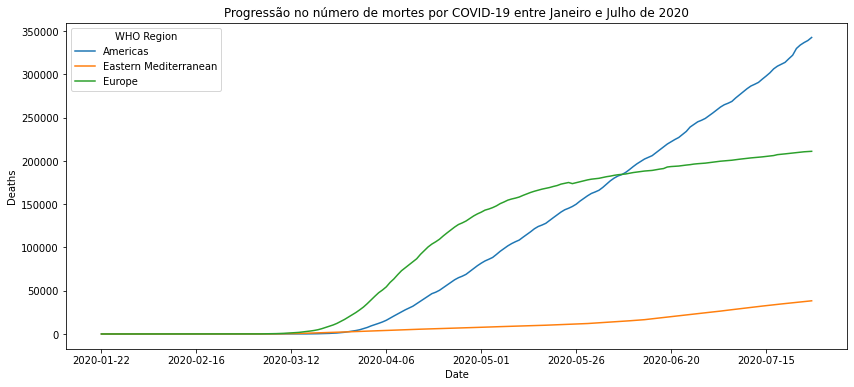

In [2]:
#1. LINE CHART
# Esse código agrupa as linhas do arquivo covid_19_clean_complete.csv por data e região, 
#além de plotar um gráfico da progressão no tempo do número de mortes de cada região

covidcsv = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")
csvgrouped = covidcsv.groupby(['Date','WHO Region']).sum('Deaths').drop(['Africa','South-East Asia','Western Pacific'], level = 'WHO Region') #Agrupando por data e região 
plt.figure(figsize=(14,6))  #Aumentando as dimensões
plt.title("Progressão no número de mortes por COVID-19 entre Janeiro e Julho de 2020")
linechart = sns.lineplot(data=csvgrouped,x = 'Date',y = 'Deaths', hue = "WHO Region")
# limitando o número de valores marcados no eixo x
linechart.xaxis.set_major_locator(plt.MaxNLocator(10))


# Análise do gráfico
# 1. A região com mais mortes é a "Americas"
# 2. A progressão da Europa e das Américas começa a subir no mês de Março, enquanto a do Mediterrâneo Oriental começa a subir de forma mais acentuada em Junho.
# 3. A progressão da Europa parece ter um crescimento exponencial, enquanto a das Américas e do Mediterrâneo Oriental tem um crescimento linear.


Text(0, 0.5, 'Mortes')

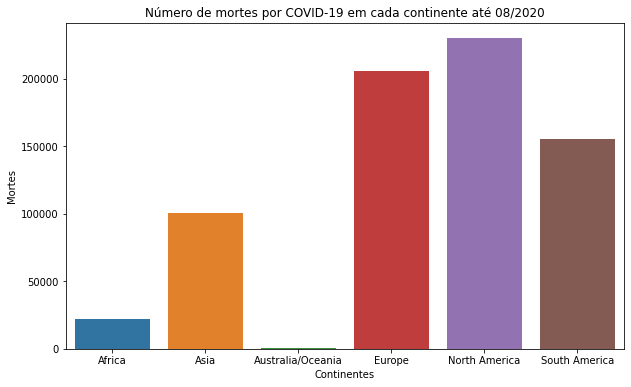

In [3]:
#2. BAR CHART
# Agrupando as linhas por continente e somando o número total de mortes
covidcsv2 = pd.read_csv("../input/corona-virus-report/worldometer_data.csv")
covidcsv2 = covidcsv2.groupby('Continent').sum('TotalDeaths')
plt.figure(figsize=(10,6)) 
plt.title("Número de mortes por COVID-19 em cada continente até 08/2020")
sns.barplot(data = covidcsv2,x = covidcsv2.index, y = 'TotalDeaths')
plt.xlabel("Continentes")
plt.ylabel("Mortes")

# Análise do gráfico
# 1. Os dois continentes com mais mortes são: América do Norte, Europa.
# 2. O continente com o menor número de mortes é a Oceania
# 3. Minha hipótese é de que por ser um continente isolado dos outros por terra, 
# os países da Oceania tiveram mais facilidade para controlar a COVID-19 e portanto menos mortes em relação aos outros continentes.

Text(0, 0.5, 'População')

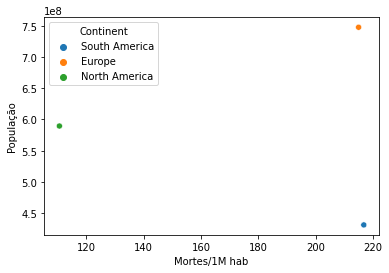

In [4]:
# 3. SCATTER PLOT
covidcsv3 = pd.read_csv("../input/corona-virus-report/worldometer_data.csv")
# Pegando a soma da população de cada continente e a média de mortes por milhão de habitantes
covidcsv3 = covidcsv3.groupby('Continent').agg({'Population' : 'sum',
                                               'Deaths/1M pop' : 'mean'}).sort_values(by='Deaths/1M pop',ascending = False)
#display(covidcsv3)
# deixando apenas os 3 primeiros continentes no dataframe
covidcsv3 = covidcsv3.drop(['Asia','Africa','Australia/Oceania'])
splot = sns.scatterplot(data = covidcsv3, x = 'Deaths/1M pop', y ='Population', hue = covidcsv3.index)
plt.xlabel("Mortes/1M hab")
plt.ylabel("População")

# Análise do gráfico
# 1. A maioria dos dados se concentra entre 200 e 220 mortes por milhão de habitantes
# 2. No caso da Europa, podemos perceber uma relação entre o número de mortes por milhão e o número de habitantes.
# 3. Apesar da Europa aparentar ter uma relação entre população/mortes por milhão, não podemos afirmar que existe relação entre essas colunas pois
# a América do Sul que tem o menor número de habitantes tem a maior taxa de mortes por milhão.


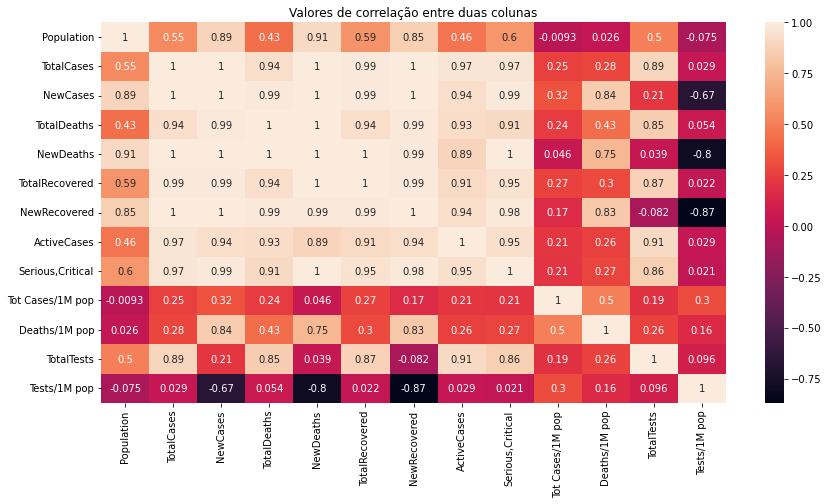

In [5]:
covidcsv4 = pd.read_csv("../input/corona-virus-report/worldometer_data.csv")
corvalue= covidcsv4.corr()
plt.figure(figsize=(14,7))
plt.title("Valores de correlação entre duas colunas")
heatmap = sns.heatmap(data=corvalue, annot=True)
